# Assignment 4

## Sherwyn Braganza | Isaac McClanahan

**1) Use the make_moons dataset from scikit-learn with 500 samples, noise = 0.1 to make an artificial data-set.  This is a 2 class data-set.**

This is some text thats gonna explain the qurstion

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

# picking out random samples with noise factor of 0.1
features, targets = datasets.make_moons(n_samples=500, shuffle=True, noise=0.1)

**2) Split this into training and validation data (no test data necessary here.**

In [3]:
x_train, y_train = features[0:400], targets[0:400]
x_val, y_val = features[400:], targets[400:]

**3) Plot both the training and validation datasets.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_24479/3112608867.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


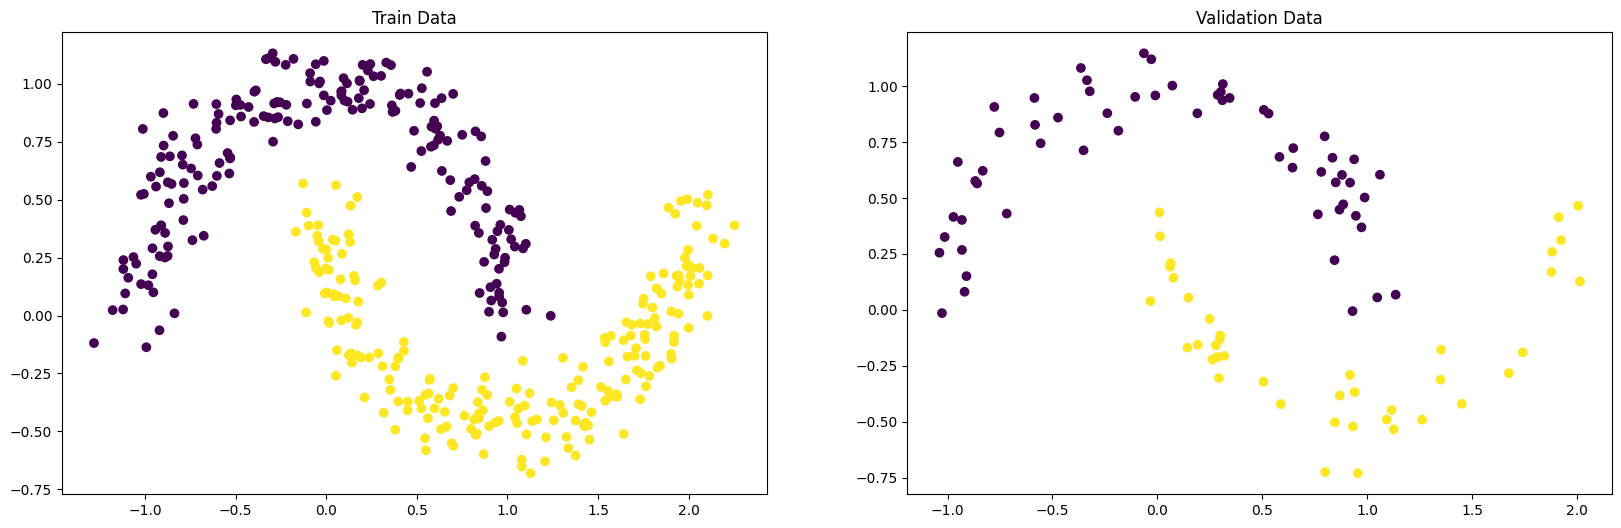

In [4]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(x_train[:,0], x_train[:,1], c=y_train)
axs[0].set_title('Train Data')
axs[1].scatter(x_val[:,0], x_val[:,1], c=y_val)
axs[1].set_title('Validation Data')
fig.set_figwidth(20)
fig.set_figheight(6)
fig.show()

**4) Implement a neural network model (that has reasonable performance) using the Sequential API.**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model_sequential = keras.Sequential(name="my_example_model")
model_sequential.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model_sequential.add(layers.Dense(32, activation="relu", name="my_second_layer"))
model_sequential.add(layers.Dense(1, activation="sigmoid", name="my_last_layer"))
model_sequential.build(input_shape=(None, 2))
model_sequential.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model_sequential.fit(x_train, y_train, epochs=75, batch_size=100, validation_data=(x_val, y_val))

Metal device set to: Apple M1


2022-11-03 08:58:09.410596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-03 08:58:09.410922: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/75


2022-11-03 08:58:09.683848: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-03 08:58:10.115121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 72ms/step - loss: 0.6502 - accuracy: 0.5500 - val_loss: 0.6432 - val_accuracy: 0.7100
Epoch 2/75
4/4 [==============================] - 0s 16ms/step - loss: 0.6007 - accuracy: 0.7850 - val_loss: 0.6049 - val_accuracy: 0.7700
Epoch 3/75
4/4 [==============================] - 0s 15ms/step - loss: 0.5632 - accuracy: 0.8150 - val_loss: 0.5712 - val_accuracy: 0.8000
Epoch 4/75


2022-11-03 08:58:10.763248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 16ms/step - loss: 0.5305 - accuracy: 0.8275 - val_loss: 0.5405 - val_accuracy: 0.8200
Epoch 5/75
4/4 [==============================] - 0s 15ms/step - loss: 0.5013 - accuracy: 0.8350 - val_loss: 0.5121 - val_accuracy: 0.8300
Epoch 6/75
4/4 [==============================] - 0s 15ms/step - loss: 0.4749 - accuracy: 0.8350 - val_loss: 0.4865 - val_accuracy: 0.8300
Epoch 7/75
4/4 [==============================] - 0s 15ms/step - loss: 0.4504 - accuracy: 0.8350 - val_loss: 0.4608 - val_accuracy: 0.8500
Epoch 8/75
4/4 [==============================] - 0s 15ms/step - loss: 0.4278 - accuracy: 0.8350 - val_loss: 0.4376 - val_accuracy: 0.8600
Epoch 9/75
4/4 [==============================] - 0s 16ms/step - loss: 0.4072 - accuracy: 0.8350 - val_loss: 0.4155 - val_accuracy: 0.8800
Epoch 10/75
4/4 [==============================] - 0s 17ms/step - loss: 0.3890 - accuracy: 0.8350 - val_loss: 0.3960 - val_accuracy: 0.8800
Epoch 11/75
4/4 [====================

4/4 [==============================] - 0s 16ms/step - loss: 0.1809 - accuracy: 0.9250 - val_loss: 0.1660 - val_accuracy: 0.9300
Epoch 63/75
4/4 [==============================] - 0s 15ms/step - loss: 0.1807 - accuracy: 0.9225 - val_loss: 0.1661 - val_accuracy: 0.9400
Epoch 64/75
4/4 [==============================] - 0s 15ms/step - loss: 0.1790 - accuracy: 0.9275 - val_loss: 0.1635 - val_accuracy: 0.9400
Epoch 65/75
4/4 [==============================] - 0s 15ms/step - loss: 0.1766 - accuracy: 0.9250 - val_loss: 0.1601 - val_accuracy: 0.9300
Epoch 66/75
4/4 [==============================] - 0s 15ms/step - loss: 0.1755 - accuracy: 0.9300 - val_loss: 0.1613 - val_accuracy: 0.9500
Epoch 67/75
4/4 [==============================] - 0s 15ms/step - loss: 0.1722 - accuracy: 0.9300 - val_loss: 0.1599 - val_accuracy: 0.9500
Epoch 68/75
4/4 [==============================] - 0s 15ms/step - loss: 0.1713 - accuracy: 0.9350 - val_loss: 0.1576 - val_accuracy: 0.9500
Epoch 69/75
4/4 [===============

**5) Plot the loss (of both training and validation) over the training epochs.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_24479/3412825889.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


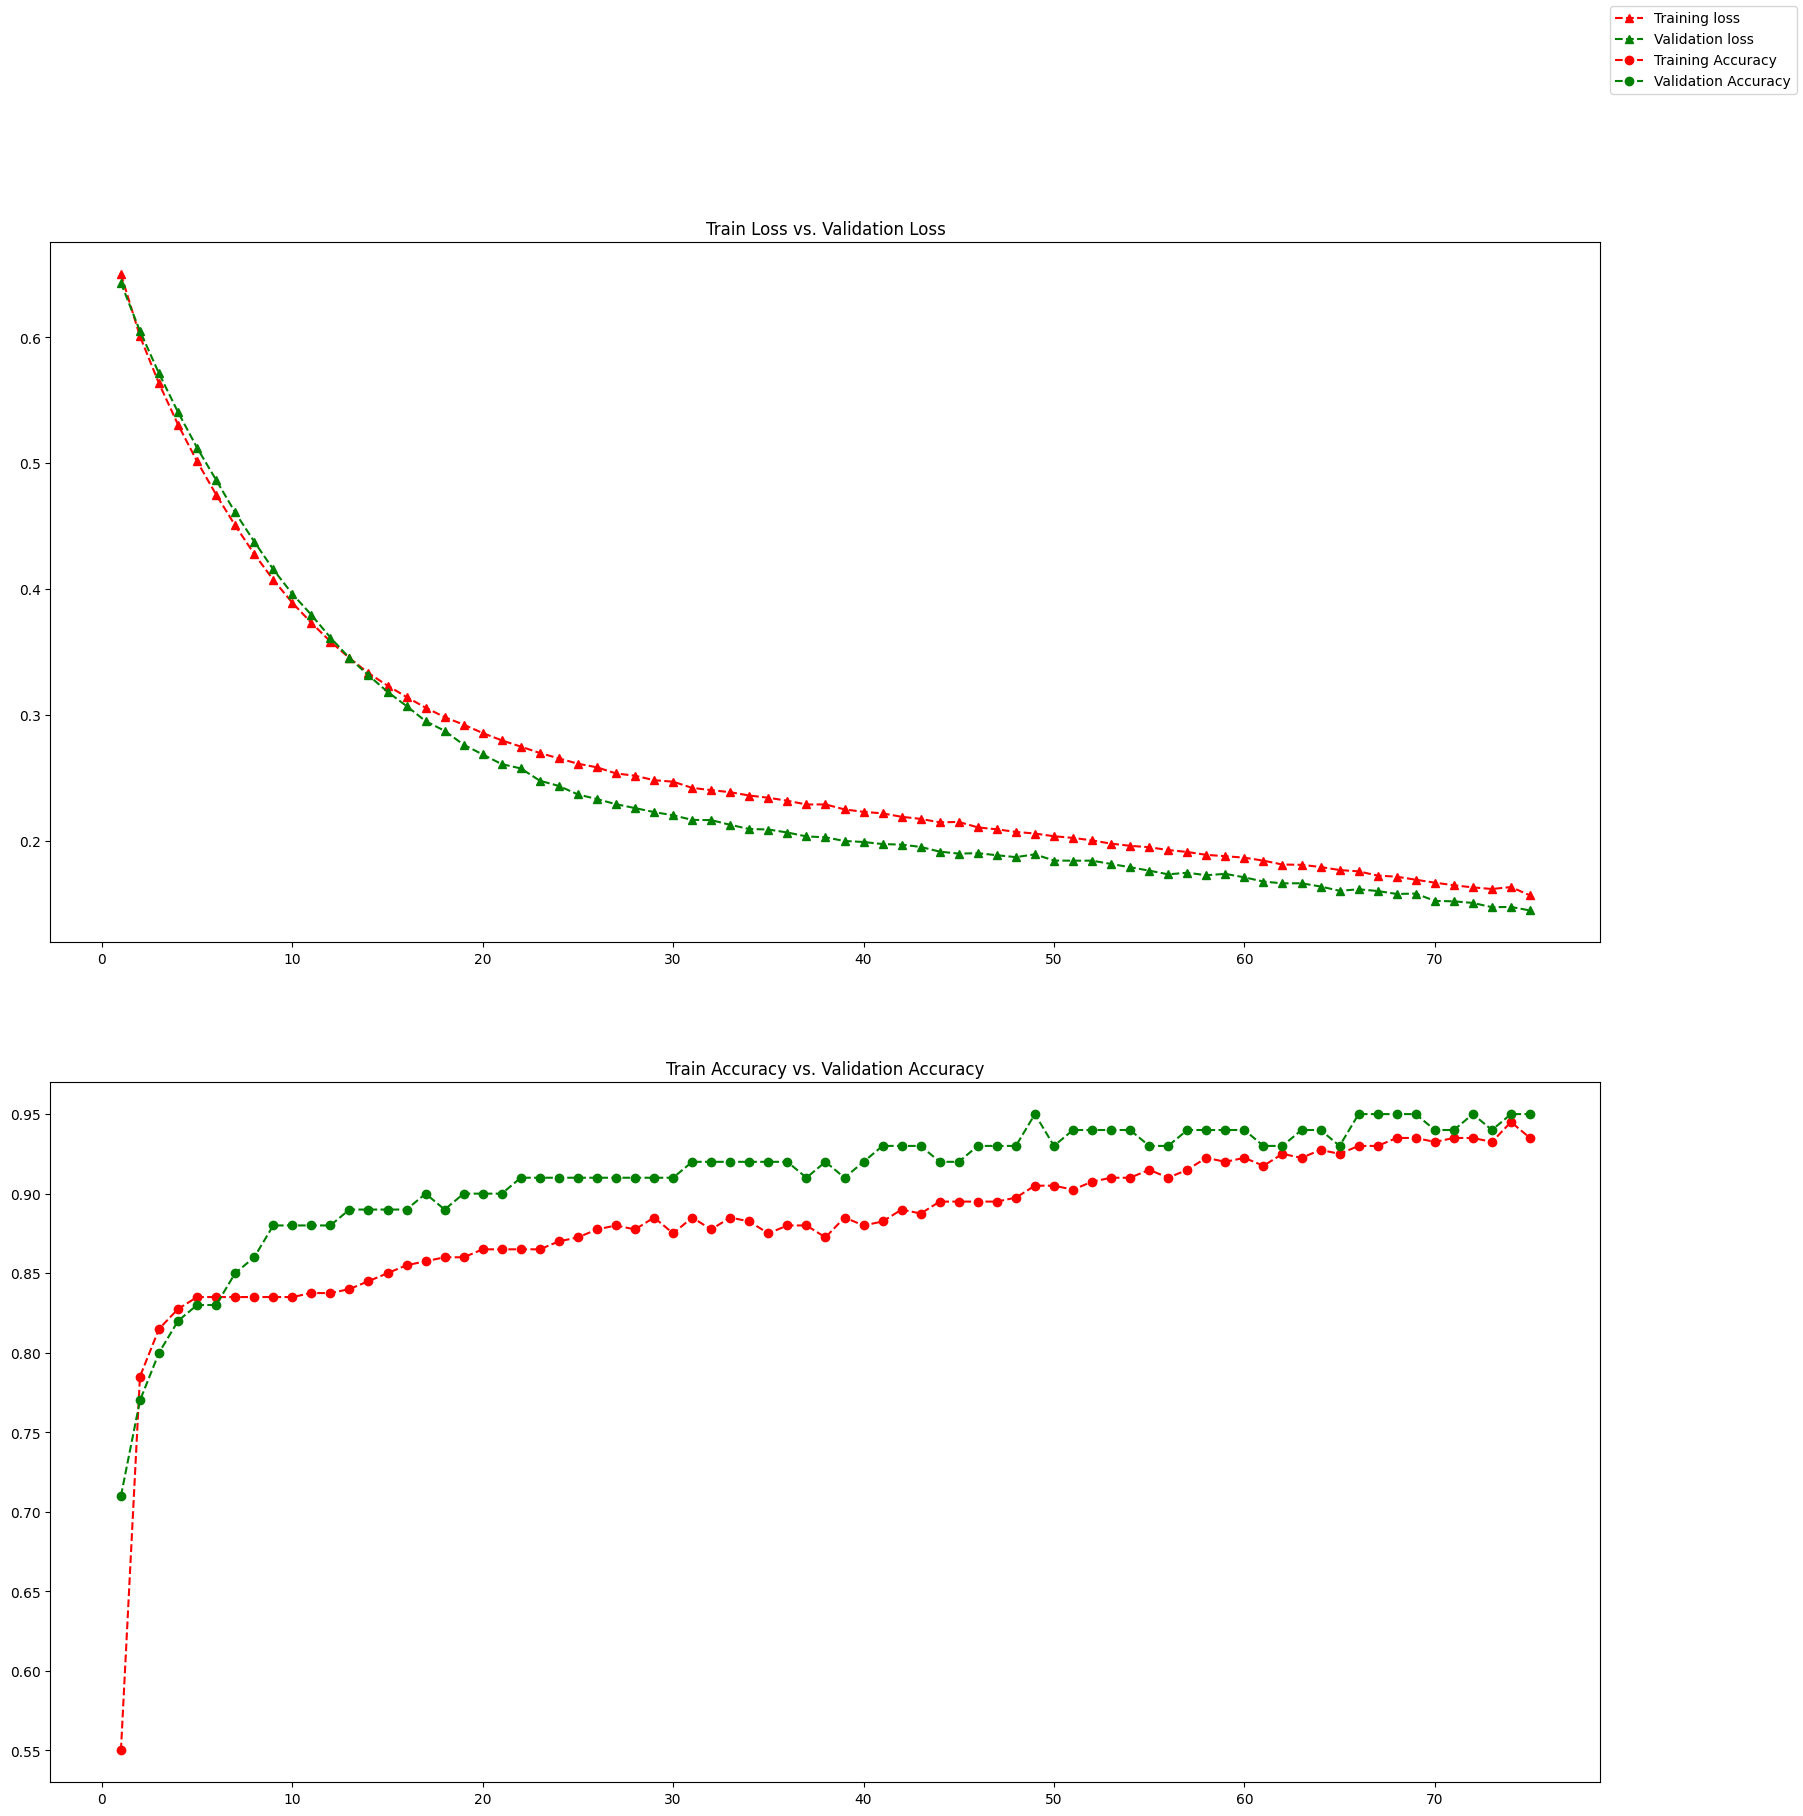

In [6]:
sequential_history = model_sequential.history.history

epochs = range(1, len(sequential_history['loss']) + 1)

fig, axs = plt.subplots(2)
axs[0].plot(epochs, sequential_history['loss'],
            label="Training loss", color = 'red', linestyle='--', marker = '^')
axs[0].plot(epochs, sequential_history['val_loss'],
            label="Validation loss", color = 'green', linestyle='--', marker = '^')
axs[0].set_title('Train Loss vs. Validation Loss')
axs[1].plot(epochs, sequential_history['accuracy'],
            label="Training Accuracy", color = 'red', linestyle='--', marker = 'o')
axs[1].plot(epochs, sequential_history['val_accuracy'],
            label="Validation Accuracy", color = 'green', linestyle='--', marker = 'o')
axs[1].set_title('Train Accuracy vs. Validation Accuracy')
fig.set_figwidth(20)
fig.set_figheight(20)
fig.legend()
fig.show()

**6) Plot the data _and_ the decision regions together on a new plot.**

16/16 [==============================] - 0s 2ms/step


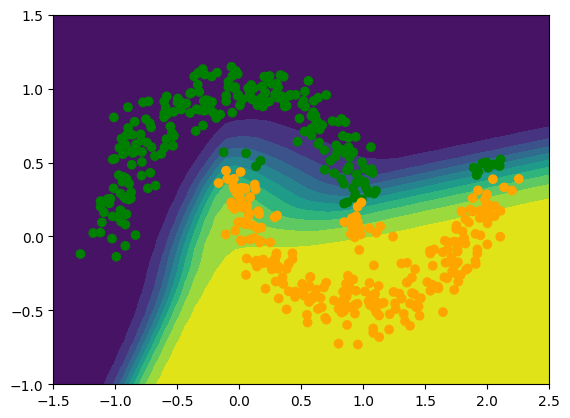

In [9]:
import numpy as np
res = 50

def addColor( values ):
    colors = []
    for i in values:
        if i < 0.5:
            colors.append("green")
        else:
            colors.append("orange")
    return colors

xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, res), np.linspace(-1, 1.5, res), indexing="xy")
zz = np.ndarray((res, res))
for i in range(0, res):
    for j in range(0, res):
        point = np.zeros((1, 2))
        point[0][0] = xx[i][j]
        point[0][1] = yy[i][j]
        zz[i][j] = model_sequential(point)
plt.contourf(xx, yy, zz, levels=10)

# predictions_sequential = np.round(model_sequential.predict(x_val))
xx, yy= np.meshgrid(features[:,0], features[:,1], sparse=True)
plt.scatter(xx, yy, c=addColor( model_sequential.predict(features) ) )

plt.show()

**7) Repeat this using the functional API.**

Epoch 1/75


2022-11-03 09:22:41.828075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 116ms/step - loss: 0.6275 - accuracy: 0.8025 - val_loss: 0.5908 - val_accuracy: 0.7400
Epoch 2/75
4/4 [==============================] - 0s 23ms/step - loss: 0.5466 - accuracy: 0.7950 - val_loss: 0.5459 - val_accuracy: 0.7300
Epoch 3/75
1/4 [======>.......................] - ETA: 0s - loss: 0.5363 - accuracy: 0.7600

2022-11-03 09:22:42.331117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 24ms/step - loss: 0.5017 - accuracy: 0.8150 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 4/75
4/4 [==============================] - 0s 19ms/step - loss: 0.4695 - accuracy: 0.8075 - val_loss: 0.4838 - val_accuracy: 0.7700
Epoch 5/75
4/4 [==============================] - 0s 20ms/step - loss: 0.4443 - accuracy: 0.8125 - val_loss: 0.4601 - val_accuracy: 0.7700
Epoch 6/75
4/4 [==============================] - 0s 20ms/step - loss: 0.4239 - accuracy: 0.8125 - val_loss: 0.4403 - val_accuracy: 0.7700
Epoch 7/75
4/4 [==============================] - 0s 19ms/step - loss: 0.4064 - accuracy: 0.8175 - val_loss: 0.4219 - val_accuracy: 0.7900
Epoch 8/75
4/4 [==============================] - 0s 19ms/step - loss: 0.3911 - accuracy: 0.8200 - val_loss: 0.4044 - val_accuracy: 0.8000
Epoch 9/75
4/4 [==============================] - 0s 20ms/step - loss: 0.3778 - accuracy: 0.8325 - val_loss: 0.3883 - val_accuracy: 0.8200
Epoch 10/75
4/4 [=====================

4/4 [==============================] - 0s 18ms/step - loss: 0.2502 - accuracy: 0.8900 - val_loss: 0.2188 - val_accuracy: 0.9400
Epoch 62/75
4/4 [==============================] - 0s 18ms/step - loss: 0.2517 - accuracy: 0.8900 - val_loss: 0.2180 - val_accuracy: 0.9400
Epoch 63/75
4/4 [==============================] - 0s 18ms/step - loss: 0.2493 - accuracy: 0.8875 - val_loss: 0.2173 - val_accuracy: 0.9400
Epoch 64/75
4/4 [==============================] - 0s 18ms/step - loss: 0.2485 - accuracy: 0.8850 - val_loss: 0.2174 - val_accuracy: 0.9400
Epoch 65/75
4/4 [==============================] - 0s 18ms/step - loss: 0.2473 - accuracy: 0.8850 - val_loss: 0.2178 - val_accuracy: 0.9400
Epoch 66/75
4/4 [==============================] - 0s 18ms/step - loss: 0.2490 - accuracy: 0.8875 - val_loss: 0.2161 - val_accuracy: 0.9400
Epoch 67/75
4/4 [==============================] - 0s 18ms/step - loss: 0.2448 - accuracy: 0.8925 - val_loss: 0.2152 - val_accuracy: 0.9400
Epoch 68/75
4/4 [===============

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_24479/1525905617.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


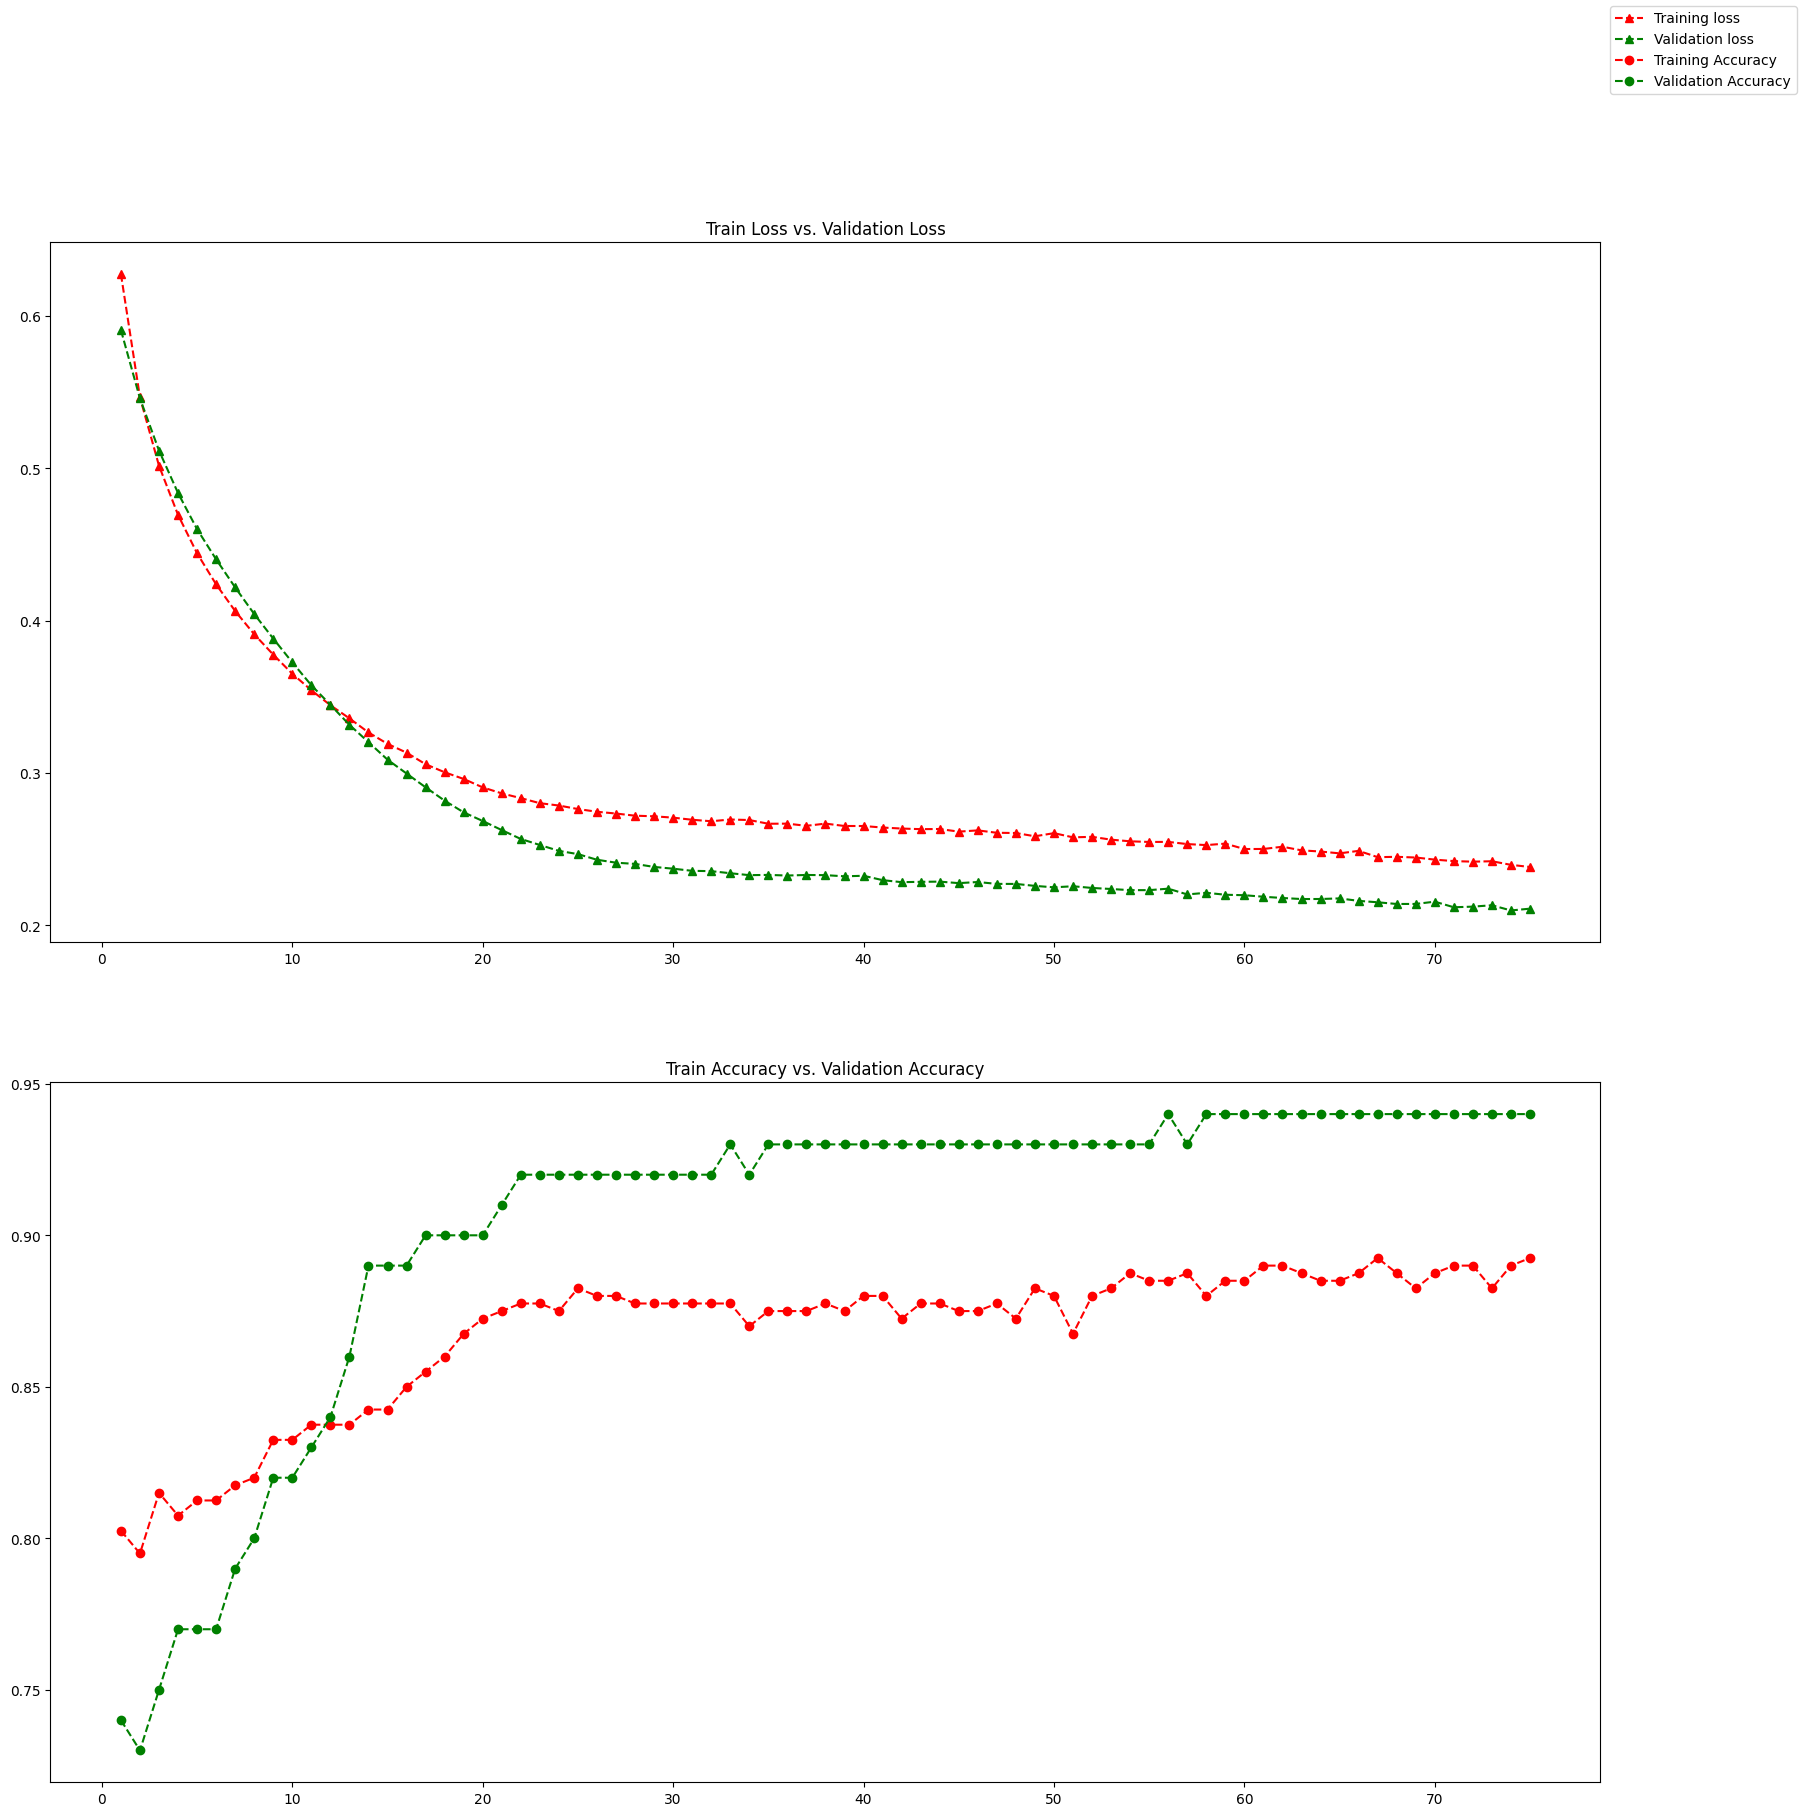

In [13]:
inputs = keras.Input(shape=(2,), name='functional_input')
features = layers.Dense(64, activation="softsign")(inputs) 
features = layers.Dense(32, activation='softsign')(features)
outputs = layers.Dense(1, activation="sigmoid")(features)
model_functional = keras.Model(inputs=inputs, outputs=outputs)
model_functional.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model_functional.fit(x_train, y_train, epochs=75, batch_size=100, validation_data=(x_val, y_val))
functional_history = model_functional.history.history

epochs = range(1, len(functional_history['loss']) + 1)

fig, axs = plt.subplots(2)
axs[0].plot(epochs, functional_history['loss'],
            label="Training loss", color = 'red', linestyle='--', marker = '^')
axs[0].plot(epochs, functional_history['val_loss'],
            label="Validation loss", color = 'green', linestyle='--', marker = '^')
axs[0].set_title('Train Loss vs. Validation Loss')
axs[1].plot(epochs, functional_history['accuracy'],
            label="Training Accuracy", color = 'red', linestyle='--', marker = 'o')
axs[1].plot(epochs, functional_history['val_accuracy'],
            label="Validation Accuracy", color = 'green', linestyle='--', marker = 'o')
axs[1].set_title('Train Accuracy vs. Validation Accuracy')
fig.set_figwidth(20)
fig.set_figheight(20)
fig.legend()
fig.show()